In [92]:
import pandas as pd
import seaborn as sns
import numpy as np

# map RDoC constructs to Yeo Components

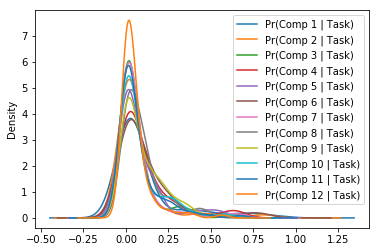

In [267]:
cogOnt_rdoc = pd.read_csv('CogOntology_RDoC.csv')
cogOnt_rdoc.set_index('Domain/Construct/Sub-construct', inplace=True)

# see distribution of Pr values to determine cutoff
ax = cogOnt_rdoc.plot.kde()


In [268]:
# filter out Pr values < .1
cogOnt_rdoc[cogOnt_rdoc > .1].fillna(np.nan).drop('Tasks', axis = 1)

,Pr(Comp 1 | Task),Pr(Comp 2 | Task),Pr(Comp 3 | Task),Pr(Comp 4 | Task),Pr(Comp 5 | Task),Pr(Comp 6 | Task),Pr(Comp 7 | Task),Pr(Comp 8 | Task),Pr(Comp 9 | Task),Pr(Comp 10 | Task),Pr(Comp 11 | Task),Pr(Comp 12 | Task)
Domain/Construct/Sub-construct,,,,,,,,,,,,
Arousal and Regulatory/Arousal,NaN,0.22123,NaN,NaN,NaN,NaN,0.40252,0.16611,NaN,NaN,NaN,NaN
Arousal and Regulatory/Sleep-Wakefulness,NaN,NaN,NaN,NaN,NaN,0.17217,NaN,0.41833,NaN,NaN,0.12516,0.16780
Cognition,NaN,NaN,NaN,NaN,NaN,NaN,0.17508,NaN,0.13710,0.60244,NaN,NaN
Cognitive/Attention,NaN,0.17897,0.17928,0.25239,NaN,NaN,NaN,NaN,0.16438,NaN,0.10479,NaN
Cognitive/Attention,0.16709,NaN,NaN,NaN,NaN,NaN,NaN,0.49269,0.18629,NaN,NaN,NaN
Cognitive/Attention,0.13747,NaN,NaN,0.16891,NaN,0.11143,NaN,0.43693,NaN,NaN,NaN,NaN
Cognitive/Attention,0.11568,NaN,NaN,0.14715,NaN,NaN,NaN,0.26665,NaN,0.15371,NaN,NaN
Cognitive/Attention,NaN,NaN,NaN,NaN,0.18773,0.12913,NaN,0.13040,0.32968,NaN,NaN,NaN
Cognitive/Attention,NaN,NaN,NaN,0.28044,NaN,0.28027,NaN,0.10799,NaN,NaN,NaN,NaN


In [269]:
# collapse across all tasks, grouped by rdoc sub-construct, and transpose
rdoc_grouped = pd.DataFrame(cogOnt_rdoc.groupby('Domain/Construct/Sub-construct').mean()).T

# plot "heatmap"
cm = sns.diverging_palette(220, 20, n=7, as_cmap=True)

s = rdoc_grouped[rdoc_grouped > .1].fillna(0).style.background_gradient(cmap=cm)
s

Domain/Construct/Sub-construct,Arousal and Regulatory/Arousal,Arousal and Regulatory/Sleep-Wakefulness,Cognition,Cognitive/Attention,"Cognitive/Cognitive Control/Goal Selection, Updating, Representation, and Maintenance",Cognitive/Cognitive Control/Performance Monitoring,"Cognitive/Cognitive Control/Response Selection, Inhibition/Suppression",Cognitive/Declarative Memory,Cognitive/Language,Cognitive/Perception/Auditory Perception,"Cognitive/Perception/Olfactory, Somatosensory, Multimodal, Perception",Cognitive/Perception/Visual Perception,Cognitive/Working Memory,"Cognitive/Working Memory/Active Maintenance, Limited Capacity, Interference","Negative Valence/Acute Threat (""Fear"")",Positive Valence/Reward Valuation,Positive Valence/Reward Valuation/Delay,"Sensorimotor/Motor Actions/Action, Planning and Selection",Sensorimotor/Motor Actions/Execution,Social/Perception and Understanding of Others/Action Perception,Social/Perception and Understanding of Others/Understanding Mental States
Pr(Comp 1 | Task),0,0,0,0,0,0,0,0,0,0,0.25564,0,0,0,0,0,0,0.28082,0.39741,0,0
Pr(Comp 2 | Task),0.22123,0,0,0,0,0,0,0,0.133566,0,0,0,0,0,0,0,0,0,0.193687,0,0
Pr(Comp 3 | Task),0,0,0,0,0,0,0,0,0.112995,0.49088,0,0,0,0,0,0,0,0,0,0.10585,0.13001
Pr(Comp 4 | Task),0,0,0,0.163054,0,0,0,0,0.131168,0,0,0.212572,0,0.27601,0,0,0,0,0,0.58233,0
Pr(Comp 5 | Task),0,0,0,0,0,0.12415,0,0,0.291608,0,0,0,0.131991,0.15094,0,0,0,0,0,0,0
Pr(Comp 6 | Task),0,0.17217,0,0.13174,0.111193,0,0.271347,0,0,0,0,0.251177,0.115726,0.11463,0,0,0,0.313147,0.176483,0.23076,0
Pr(Comp 7 | Task),0.40252,0,0.17508,0,0,0,0,0,0,0,0.229854,0,0,0,0.31952,0,0,0,0,0,0
Pr(Comp 8 | Task),0.16611,0.41833,0,0.211483,0.108857,0.30788,0.3195,0.133061,0,0,0,0,0,0,0,0,0,0,0,0,0
Pr(Comp 9 | Task),0,0,0.1371,0.128916,0.425803,0.19404,0.112713,0.128603,0,0,0,0,0.196926,0.21229,0,0,0.24609,0,0,0,0
Pr(Comp 10 | Task),0,0,0.60244,0,0,0.10772,0,0.161057,0,0,0,0,0.107926,0,0.27677,0,0.4241,0.112973,0,0,0.55095


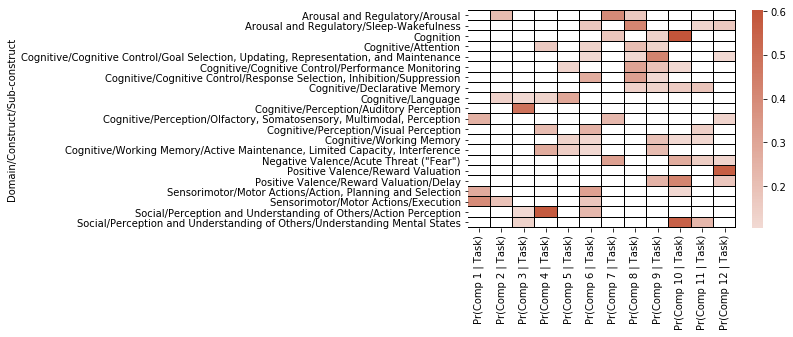

In [270]:
sns.heatmap(rdoc_grouped[rdoc_grouped > .1].fillna(np.nan).T, cmap=cmap, center = 0, linewidths=.01, linecolor='black', cbar=True)

In [246]:
# for each rdoc construct, rank the top 3 components, transpose back

df = rdoc_grouped
i = df.index.values
v = df.values
n = 3
df_ranked = pd.DataFrame(i[v.argsort(0)[::-1]][:n], columns=df.columns).T
df_ranked

,0,1,2
Domain/Construct/Sub-construct,,,
Arousal and Regulatory/Arousal,Pr(Comp 7 | Task),Pr(Comp 2 | Task),Pr(Comp 8 | Task)
Arousal and Regulatory/Sleep-Wakefulness,Pr(Comp 8 | Task),Pr(Comp 6 | Task),Pr(Comp 12 | Task)
Cognition,Pr(Comp 10 | Task),Pr(Comp 7 | Task),Pr(Comp 9 | Task)
Cognitive/Attention,Pr(Comp 8 | Task),Pr(Comp 4 | Task),Pr(Comp 6 | Task)
"Cognitive/Cognitive Control/Goal Selection, Updating, Representation, and Maintenance",Pr(Comp 9 | Task),Pr(Comp 6 | Task),Pr(Comp 8 | Task)
Cognitive/Cognitive Control/Performance Monitoring,Pr(Comp 8 | Task),Pr(Comp 9 | Task),Pr(Comp 5 | Task)
"Cognitive/Cognitive Control/Response Selection, Inhibition/Suppression",Pr(Comp 8 | Task),Pr(Comp 6 | Task),Pr(Comp 9 | Task)
Cognitive/Declarative Memory,Pr(Comp 11 | Task),Pr(Comp 10 | Task),Pr(Comp 8 | Task)
Cognitive/Language,Pr(Comp 5 | Task),Pr(Comp 2 | Task),Pr(Comp 4 | Task)


In [247]:
# index to column
df_ranked.reset_index(level=0, inplace=True)
df_ranked

,Domain/Construct/Sub-construct,0,1,2
0,Arousal and Regulatory/Arousal,Pr(Comp 7 | Task),Pr(Comp 2 | Task),Pr(Comp 8 | Task)
1,Arousal and Regulatory/Sleep-Wakefulness,Pr(Comp 8 | Task),Pr(Comp 6 | Task),Pr(Comp 12 | Task)
2,Cognition,Pr(Comp 10 | Task),Pr(Comp 7 | Task),Pr(Comp 9 | Task)
3,Cognitive/Attention,Pr(Comp 8 | Task),Pr(Comp 4 | Task),Pr(Comp 6 | Task)
4,"Cognitive/Cognitive Control/Goal Selection, Up...",Pr(Comp 9 | Task),Pr(Comp 6 | Task),Pr(Comp 8 | Task)
5,Cognitive/Cognitive Control/Performance Monito...,Pr(Comp 8 | Task),Pr(Comp 9 | Task),Pr(Comp 5 | Task)
6,Cognitive/Cognitive Control/Response Selection...,Pr(Comp 8 | Task),Pr(Comp 6 | Task),Pr(Comp 9 | Task)
7,Cognitive/Declarative Memory,Pr(Comp 11 | Task),Pr(Comp 10 | Task),Pr(Comp 8 | Task)
8,Cognitive/Language,Pr(Comp 5 | Task),Pr(Comp 2 | Task),Pr(Comp 4 | Task)
9,Cognitive/Perception/Auditory Perception,Pr(Comp 3 | Task),Pr(Comp 10 | Task),Pr(Comp 6 | Task)


## RDoC constructs with top 3 components ranked

In [258]:
# split 'Domain/Construct/Sub-construct' by sep='/'
pd.concat([pd.DataFrame(df_ranked['Domain/Construct/Sub-construct'].str.split('/',2).tolist(),
                                   columns = ['Domain','Construct', 'Sub-construct']), df_ranked], axis=1)



,Domain,Construct,Sub-construct,Domain/Construct/Sub-construct,0,1,2
0,Arousal and Regulatory,Arousal,None,Arousal and Regulatory/Arousal,Pr(Comp 7 | Task),Pr(Comp 2 | Task),Pr(Comp 8 | Task)
1,Arousal and Regulatory,Sleep-Wakefulness,None,Arousal and Regulatory/Sleep-Wakefulness,Pr(Comp 8 | Task),Pr(Comp 6 | Task),Pr(Comp 12 | Task)
2,Cognition,None,None,Cognition,Pr(Comp 10 | Task),Pr(Comp 7 | Task),Pr(Comp 9 | Task)
3,Cognitive,Attention,None,Cognitive/Attention,Pr(Comp 8 | Task),Pr(Comp 4 | Task),Pr(Comp 6 | Task)
4,Cognitive,Cognitive Control,"Goal Selection, Updating, Representation, and ...","Cognitive/Cognitive Control/Goal Selection, Up...",Pr(Comp 9 | Task),Pr(Comp 6 | Task),Pr(Comp 8 | Task)
5,Cognitive,Cognitive Control,Performance Monitoring,Cognitive/Cognitive Control/Performance Monito...,Pr(Comp 8 | Task),Pr(Comp 9 | Task),Pr(Comp 5 | Task)
6,Cognitive,Cognitive Control,"Response Selection, Inhibition/Suppression",Cognitive/Cognitive Control/Response Selection...,Pr(Comp 8 | Task),Pr(Comp 6 | Task),Pr(Comp 9 | Task)
7,Cognitive,Declarative Memory,None,Cognitive/Declarative Memory,Pr(Comp 11 | Task),Pr(Comp 10 | Task),Pr(Comp 8 | Task)
8,Cognitive,Language,None,Cognitive/Language,Pr(Comp 5 | Task),Pr(Comp 2 | Task),Pr(Comp 4 | Task)
9,Cognitive,Perception,Auditory Perception,Cognitive/Perception/Auditory Perception,Pr(Comp 3 | Task),Pr(Comp 10 | Task),Pr(Comp 6 | Task)
